In [20]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [21]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the Alpaca api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [22]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST()
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [23]:
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE
# Get all Asstes
assets = api.list_assets()

# Keep only tradeable assets
tradeable = [asset for asset in assets if asset.tradable ]
tradeable

[Asset({   'class': 'us_equity',
     'easy_to_borrow': True,
     'exchange': 'ARCA',
     'id': '3a64306e-4a77-4a06-8458-15a8bfd31f55',
     'marginable': True,
     'name': 'Vanguard Total Stock Market ETF',
     'shortable': True,
     'status': 'active',
     'symbol': 'VTI',
     'tradable': True}), Asset({   'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'ARCA',
     'id': '4ef5ad27-f4d8-42b5-8cbe-8abdd4af925a',
     'marginable': True,
     'name': 'Direxion Daily MSCI Brazil Bull 2X Shares',
     'shortable': False,
     'status': 'active',
     'symbol': 'BRZU',
     'tradable': True}), Asset({   'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'ARCA',
     'id': 'ef7cc734-f470-4448-931c-842fcc85f8b4',
     'marginable': True,
     'name': 'Direxion Daily Regional Banks Bull 3X Shares',
     'shortable': False,
     'status': 'active',
     'symbol': 'DPST',
     'tradable': True}), Asset({   'class': 'us_equity',
     'easy_to_borrow

In [28]:
# Create a new empty DataFrame
asset_info_df = pd.DataFrame()
asset_info_df['symbol'] = pd.Series([asset.symbol for asset in assets])

# Display the first 10 asset tickers
asset_info_df.sample(5)

,symbol
4105,NPO
8258,GSTCQ
1913,ESGG
4725,PNFP
1388,CTA-B


In [ ]:
tickers = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for AAPL
df = api.get_barset(
    tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

df.head()

In [38]:
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

,AGG,SPY
,close,close
time,,
2019-12-02 00:00:00-05:00,112.48,311.60
2019-12-03 00:00:00-05:00,113.02,309.47
2019-12-04 00:00:00-05:00,112.80,311.47
2019-12-05 00:00:00-05:00,112.69,312.05
2019-12-06 00:00:00-05:00,112.54,314.84


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [37]:
# Calculate the daily roi for the stocks
# ROI = (curent value - cost of investment)/cost of invenstment
agg_rio =  (df.iloc[-1,0] - df.iloc[0,0]) / df.iloc[0,0] * 100
print(agg_rio)
spy_rio =  (df.iloc[-1,1] - df.iloc[0,1]) / df.iloc[0,1] * 100
print(spy_rio)

4.3296586059743865
-9.165596919127086


In [39]:
# Calculate volatility
# volatitily = std
# first percent change
daily_returns = df.pct_change()
daily_returns.head()

,AGG,SPY
,close,close
time,,
2019-12-02 00:00:00-05:00,NaN,NaN
2019-12-03 00:00:00-05:00,0.004801,-0.006836
2019-12-04 00:00:00-05:00,-0.001947,0.006463
2019-12-05 00:00:00-05:00,-0.000975,0.001862
2019-12-06 00:00:00-05:00,-0.001331,0.008941


In [44]:
# Calculate volatility
# second daily retuns
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
print(avg_daily_return_agg)
print(avg_daily_return_spy)


0.0004642419659641526
-0.0005019258235842385


In [45]:
#then std...
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
print(std_dev_daily_return_agg)
print(std_dev_daily_return_spy)

0.008486108332796815
0.03063696813913626


In [48]:
# Save the last day's closing price
agg_last_price = df.iloc[-1,0]
spy_last_price = df.iloc[-1,1]
print(agg_last_price)
print(spy_last_price)

117.35
283.04


In [49]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()

In [75]:
# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
    # Initialize the simulated prices list with the last closing price of `agg` and `spy`
    simulated_agg_prices = [agg_last_price]
    simulated_spy_prices = [spy_last_price]
    
     # Simulate the returns for 252 days * 30 years
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        
        # Append the simulated price to the list
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% AGG; 40% SPY)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()    

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002011,0.992414,0.989535,0.992751,0.972526,1.024362,0.996935,1.024583,0.977809,1.020878,...,0.973340,1.006378,1.015840,0.991790,0.994469,1.001367,1.017119,1.000427,1.001560,1.008687
2,1.002624,1.004974,1.013952,0.989204,0.988354,1.004495,1.007987,1.032227,0.969534,1.041817,...,0.985485,1.013316,1.009298,0.989138,0.988115,1.010586,1.017787,0.996207,0.990042,1.033389
3,0.983990,0.989461,1.022595,0.988217,0.989252,1.009561,1.016657,1.047900,0.986996,1.047898,...,0.978630,1.007364,1.018420,0.973722,0.984997,1.025716,0.990185,1.020366,0.996441,1.043007
4,0.971893,0.978919,1.027566,0.991740,0.982475,0.996846,1.018847,1.070265,0.987670,1.041678,...,0.986038,1.017992,1.014874,0.958408,0.978758,1.006604,0.997280,1.007051,1.016594,1.032458


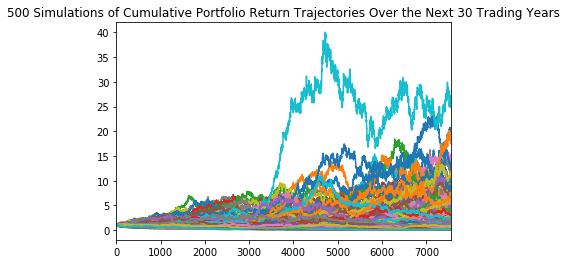

In [76]:
# Visualize the Simulation
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 Trading Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [77]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    1.307235
1    0.652985
2    2.646415
3    0.134453
4    0.283222
Name: 7560, dtype: float64

In [78]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
year20_cumulative_returns = portfolio_cumulative_returns.iloc[252*20, :]
year20_cumulative_returns.head()

0    1.122113
1    1.305915
2    1.492120
3    0.136307
4    0.185041
Name: 5040, dtype: float64

In [79]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    0.126206
0.95    6.664124
Name: 7560, dtype: float64

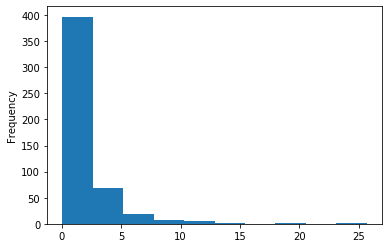

In [80]:
ending_cumulative_returns.plot(kind='hist')

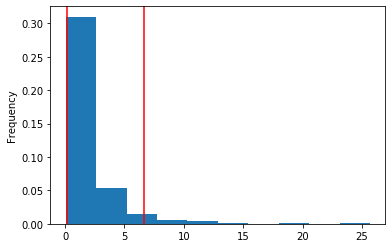

In [81]:
# Visualize the distribution of the ending returns
ending_cumulative_returns.value_counts(bins=10) / len(ending_cumulative_returns)

plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [85]:
# YOUR CODE HERE
year30_10pecentile = np.percentile(ending_cumulative_returns, 10)
year30_50pecentile = np.percentile(ending_cumulative_returns, 50)
year30_90pecentile = np.percentile(ending_cumulative_returns, 90)
print(year30_10pecentile)
print(year30_50pecentile)
print(year30_90pecentile)


0.20782521246405705
0.9315422451756391
4.072311035005998


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [99]:
# YOUR CODE HERE
initial_investment = 20000

year30_10pct_return = initial_investment * year30_10pecentile 
year30_50pct_return = initial_investment * year30_50pecentile 
year30_90pct_return = initial_investment * year30_90pecentile 

print(f"The expected portfolio return in 30 years at: the 10th percentile is ${round(year30_10pct_return,2)}, the 50th percentile is ${round(year30_50pct_return,2)}, and the 90th percentile is ${round(year30_90pct_return,2)}")


The expected portfolio return in 30 years at: the 10th percentile is $4156.5, the 50th percentile is $18630.84, and the 90th percentile is $81446.22


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [109]:
# YOUR CODE HERE
projected_annual_income = 6085
withdrawl = year30_10pct_return * .04
difference = projected_annual_income - withdrawl

if projected_annual_income < withdrawl:
    print(f"Harold can surive on ${round(withdraw,2)}.")
else:
    print(f"Harold will need to make up {round(difference,2)} based on this portfolio's performance.")

Harold will need to make up 5918.74 based on this portfolio's performance.


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [110]:
# YOUR CODE HERE
increased_withdrawl = withdrawl * 1.5
slight_difference = projected_annual_income - increased_withdrawl

if projected_annual_income < increased_withdrawl:
    print(f"Harold can surive on ${round(increased_withdrawl,2)}.")
else:
    print(f"Harold will need to make up {round(slight_difference,2)} based on this portfolio's performance.")

Harold will need to make up 5835.61 based on this portfolio's performance.


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE